In [1]:
def sliding_average(numbers, window_size):
    averages = []
    for i in range(len(numbers) - window_size + 1):
        window = numbers[i:i + window_size]
        averages.append(sum(window) / window_size)
    return averages


In [2]:
import numpy as np


np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)

mean_real = np.mean(data)
std_real = np.std(data)


lower = mean_real - std_real
upper = mean_real + std_real
percentage = np.mean((data >= lower) & (data <= upper)) * 100

mean_real, std_real, percentage


(np.float64(50.193320558223256),
 np.float64(9.787262077473542),
 np.float64(68.60000000000001))

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)

df = pd.DataFrame({
    "age": np.random.randint(18, 71, 1000),
    "income": np.random.randint(30000, 150001, 1000),
    "purchases": np.random.randint(0, 21, 1000)
})


mean_income_all = df["income"].mean()
mean_income_over_50 = df.loc[df["age"] > 50, "income"].mean()

mean_income_all, mean_income_over_50


(np.float64(88896.486), np.float64(87862.42705570292))

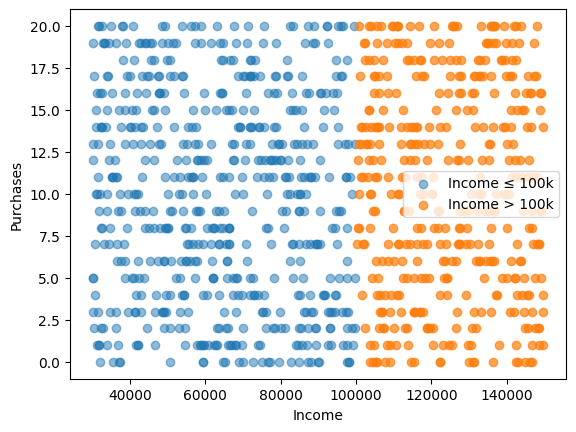

In [4]:
import matplotlib.pyplot as plt


high_income = df["income"] > 100000

plt.figure()
plt.scatter(df.loc[~high_income, "income"],
            df.loc[~high_income, "purchases"],
            alpha=0.5,
            label="Income ≤ 100k")

plt.scatter(df.loc[high_income, "income"],
            df.loc[high_income, "purchases"],
            alpha=0.7,
            label="Income > 100k")

plt.xlabel("Income")
plt.ylabel("Purchases")
plt.legend()
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


df["target"] = np.where(
    (df["income"] > 90000) & (df["purchases"] > 8),
    1,
    0
)

X = df[["income", "purchases"]]
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

acc, cm


(0.9266666666666666,
 array([[201,   7],
        [ 15,  77]]))